In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read, write
from dynasor.qpoints import get_spherical_qpoints
from dynasor import compute_static_structure_factors, Trajectory
from dynasor.post_processing import get_spherically_averaged_sample_smearing 
import os 

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
os.chdir('/Users/prakriti/2024_BaZrS3_Phase_Transitions/')
structure_tags = ['BaZrS3-spg221-Pm3m','BaZrS3-spg140-I4mcm','BaZrS3-spg62-Pnma']
structure_tags = ['BaZrS3-spg221-Pm3m','BaZrS3-spg140-I4mcm']
data_dict = dict()
for structure_tag in structure_tags:

    # write dummy traj
    atoms = read(f'structures/{structure_tag}.xyz')
    atoms.calc = None
    print(atoms)
    n_atoms = len(atoms)
    traj = [atoms for _ in range(2)]
    write('tmp_traj.xyz', traj)

    # setup traj
    traj = Trajectory('tmp_traj.xyz', trajectory_format='extxyz', atomic_indices="read_from_trajectory")

    # q-points
    q_max = 3
    q_points = get_spherical_qpoints(traj.cell, q_max=q_max)

    # compute Sq
    sample = compute_static_structure_factors(traj, q_points)
    q_norms = np.linalg.norm(sample.q_points, axis=1)
    data_dict[structure_tag] = q_norms, sample.Sq / n_atoms

Atoms(symbols='BaZrS3', pbc=True, cell=[5.01430004764237, 5.01430004764237, 5.01430004764237])


INFO: Trajectory file: tmp_traj.xyz
INFO: Total number of particles: 5
INFO: Number of atom types: 3
INFO: Number of atoms of type Ba: 1
INFO: Number of atoms of type S: 3
INFO: Number of atoms of type Zr: 1
INFO: Simulation cell (in Angstrom):
[[5.01430005 0.         0.        ]
 [0.         5.01430005 0.        ]
 [0.         0.         5.01430005]]
INFO: Number of q-points: 17
Atoms(symbols='Ba2S6Zr2', pbc=True, cell=[[-3.46814503, 3.46814517, 5.09857675], [3.46814513, -3.46814507, 5.09857675], [3.46814507, 3.46814503, -5.09857682]], forces=...)
INFO: Trajectory file: tmp_traj.xyz
INFO: Total number of particles: 10
INFO: Number of atom types: 3
INFO: Number of atoms of type Ba: 2
INFO: Number of atoms of type S: 6
INFO: Number of atoms of type Zr: 2
INFO: Simulation cell (in Angstrom):
[[-3.46814503  3.46814517  5.09857675]
 [ 3.46814513 -3.46814507  5.09857675]
 [ 3.46814507  3.46814503 -5.09857682]]
INFO: Number of q-points: 13


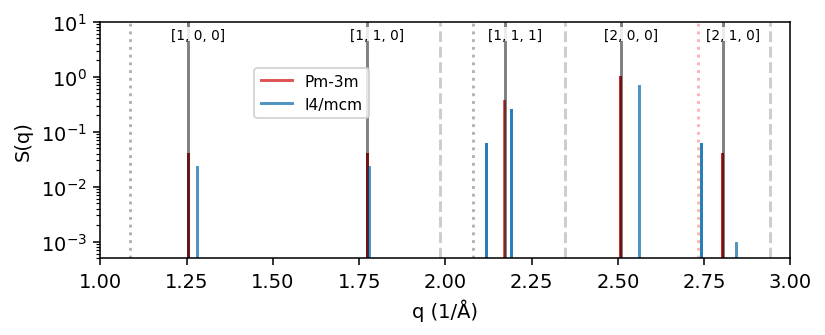

In [11]:
# plot setup
fig = plt.figure(figsize=(6.0, 2.5), dpi=140)
ax1 = fig.add_subplot()

colors = dict()
colors['BaZrS3-spg221-Pm3m'] = 'tab:red'
colors['BaZrS3-spg140-I4mcm'] = 'tab:blue'
colors['BaZrS3-spg62-Pnma'] = 'tab:green'

labels = dict()
labels['BaZrS3-spg221-Pm3m'] = r'Pm-3m'
labels['BaZrS3-spg140-I4mcm'] = r'I4/mcm'
labels['BaZrS3-spg62-Pnma'] = r'Pnma'

xlim = [1, 3]
ylim = [0.0005, 10]
alpha = 0.8


# plot S(q) as vertical lines
for structure_tag, (q_norms, Sq) in data_dict.items():
    for q, S in zip(q_norms, Sq):
        ax1.plot([q, q], [0, S[0]], color=colors[structure_tag], alpha=alpha)
    ax1.plot(np.nan, np.nan, color=colors[structure_tag], alpha=alpha, label=labels[structure_tag])


# Mark the cubic gamma-points
alat = 5.01
alpha = 0.5
fs = 7
bbox = dict(facecolor='w', edgecolor='none', alpha=0.85, pad=0.0)

q_vecs = [[1, 0, 0], [1, 1, 0], [1, 1, 1], [2, 0, 0], [2,1,0]]
for qvec in q_vecs:
    q = 2 * np.pi / alat * np.linalg.norm(qvec)
    ax1.axvline(x=q, ls='-', color='k', alpha=alpha)
    ax1.text(q -0.05, 0.5 * ylim[-1], str(qvec), fontsize=fs, bbox=bbox)

qvec_R1 = [0.5, 0.5, 0.5]
qvec_R2 = [1.5, 0.5, 0.5]
qvec_R3 = [1.5, 1.5, 0.5]
qvec_R4 = [1.5, 1.5, 1.5]
qvec_R5 = [1.5, 0.5, 1.5]

qvec_M1 = [0.5, 0.5, 0]
qvec_M2 = [1.5, 0.5, 0]
qvec_M3 = [1.5, 0.5, 1.0]
qvec_M4 = [1.5, 1.5, 1.0]
q_R1 = 2 * np.pi / alat * np.linalg.norm(qvec_R1)
q_R2 = 2 * np.pi / alat * np.linalg.norm(qvec_R2)
q_R3 = 2 * np.pi / alat * np.linalg.norm(qvec_R3)
q_R4 = 2 * np.pi / alat * np.linalg.norm(qvec_R4)
q_R5 = 2 * np.pi / alat * np.linalg.norm(qvec_R5)

q_M1 = 2 * np.pi / alat * np.linalg.norm(qvec_M1)
q_M2 = 2 * np.pi / alat * np.linalg.norm(qvec_M2)
q_M3 = 2 * np.pi / alat * np.linalg.norm(qvec_M3)
q_M4 = 2 * np.pi / alat * np.linalg.norm(qvec_M4)

ax1.axvline(x=q_R1, ls=':', color='k', alpha=alpha-0.2)
ax1.axvline(x=q_R2, ls=':', color='k', alpha=alpha-0.2)
#ax1.axvline(x=q_R3, ls=':', color='blue', alpha=alpha-0.2)
ax1.axvline(x=q_R4, ls=':', color='k', alpha=alpha-0.2)
ax1.axvline(x=q_R5, ls=':', color='red', alpha=alpha-0.2)

ax1.axvline(x=q_M1, ls='--', color='k', alpha=alpha-0.3)
ax1.axvline(x=q_M2, ls='--', color='k', alpha=alpha-0.3)
ax1.axvline(x=q_M3, ls='--', color='k', alpha=alpha-0.3)
ax1.axvline(x=q_M4, ls='--', color='k', alpha=alpha-0.3)
# Mark the cubic M-points


#ax1.text(q_M1, 0.2 * ylim[-1], 'M', fontsize=fs, bbox=bbox)
#ax1.text(q_M2, 0.2 * ylim[-1], 'M', fontsize=fs, bbox=bbox)
#ax1.text(q_R1, 0.05 * ylim[-1], 'R', fontsize=fs, bbox=bbox)
#ax1.text(q_R2, 0.05 * ylim[-1], 'R', fontsize=fs, bbox=bbox)


ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_yscale('log')
ax1.legend(loc=1, fontsize=8, bbox_to_anchor=(0.4, 0.84))
ax1.set_xlabel('q (1/Å)')
ax1.set_ylabel('S(q)')

fig.tight_layout()

# MD 


In [17]:
import os 
q_max = 3.0
q_linspace = np.linspace(0, q_max, 2000)
q_width = 0.001
data_dict_qwidths = dict()
# setup traj

for temp in np.arange(100,1200,50):
    if temp < 610:
        text1 = f'/Users/prakriti/XRD/XRD_ortho/ortho/'
        dirname = f'equilibration-a+b-b--nat5040-T{temp}-P0-ns50000/'
    else:
        text1 = f'/Users/prakriti/XRD/XRD/XRD/'
        if temp < 890:
            dirname = f'BaZrS3_I4mcm_size4_T{temp}_seekpath/'
        else:
            dirname = f'BaZrS3_Pm-3m_size10_T{temp}_seekpath/'
    print(text1+dirname)
    traj = Trajectory(text1 + dirname + 'dump.extxyz', trajectory_format='extxyz')


    # generate all q-points in supercell
    q_points = get_spherical_qpoints(traj.cell, q_max=q_max)

    # compute Sq
    sample = compute_static_structure_factors(traj, q_points)

    sample_averaged = get_spherically_averaged_sample_smearing(sample, q_norms=q_linspace, q_width=q_width)
    data_dict_qwidths[temp] = sample_averaged.q_norms, sample_averaged.Sq

/Users/prakriti/XRD/XRD_ortho/ortho/equilibration-a+b-b--nat5040-T100-P0-ns50000/
INFO: Trajectory file: /Users/prakriti/XRD/XRD_ortho/ortho/equilibration-a+b-b--nat5040-T100-P0-ns50000/dump.extxyz
INFO: Total number of particles: 5040
INFO: Number of atom types: 1
INFO: Number of atoms of type X: 5040
INFO: Simulation cell (in Angstrom):
[[42.05263143  0.          0.        ]
 [ 0.         42.83961451  0.        ]
 [ 0.          0.         70.23793906]]
INFO: Number of q-points: 7930
/Users/prakriti/XRD/XRD_ortho/ortho/equilibration-a+b-b--nat5040-T150-P0-ns50000/
INFO: Trajectory file: /Users/prakriti/XRD/XRD_ortho/ortho/equilibration-a+b-b--nat5040-T150-P0-ns50000/dump.extxyz
INFO: Total number of particles: 5040
INFO: Number of atom types: 1
INFO: Number of atoms of type X: 5040
INFO: Simulation cell (in Angstrom):
[[42.05263143  0.          0.        ]
 [ 0.         42.83961451  0.        ]
 [ 0.          0.         70.23793906]]
INFO: Number of q-points: 7930
/Users/prakriti/XRD/

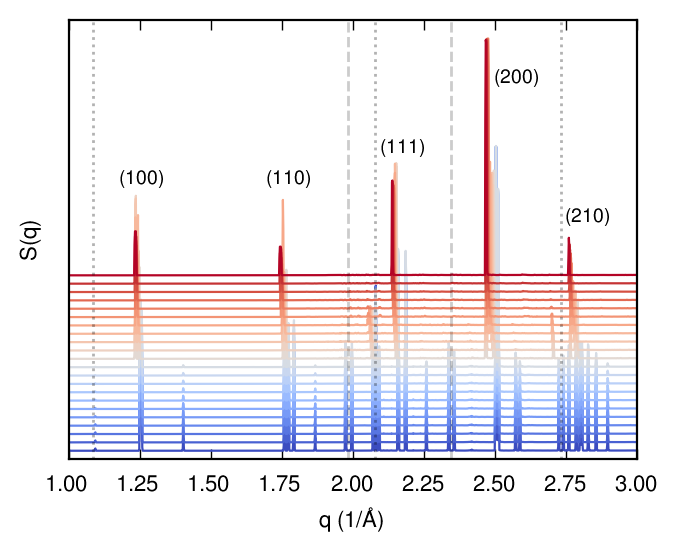

In [22]:
import mplpub
mplpub.setup(template='acs')

count = 10
fig = plt.figure(figsize=(3.4, 2.8), dpi=200)
ax = fig.add_subplot(111)
n = 22
ax.set_prop_cycle('color',[plt.cm.coolwarm(i) for i in np.linspace(0, 1, n)])
# plotting of gaussian spherical average S(q)
for temp, (q, Sq) in data_dict_qwidths.items():
    count = count*1.1
    if temp > 600:
    #    print(temp)
        ax.plot(q, Sq+(count), '-', label=rf'{temp}', lw=0.8)
    else:
        ax.plot(q, Sq+(count), '-', label=rf'{temp}', lw=0.8)

ax.set_xlabel('q (1/Å)', fontsize='8')
ax.set_ylabel('S(q)', fontsize='8')
ax.set_xlim([1, 3.0])
ax.legend(loc=2, fontsize=7)
#if log_yscale:
ax.set_yscale('log')
ax.set_ylim(10, 1500)
#else:
#ax.set_ylim(0.0, 10)

    
# Mark the cubic M-points
qvec_R1 = [0.5, 0.5, 0.5]
qvec_R2 = [1.5, 0.5, 0.5]
qvec_R3 = [1.5, 1.5, 0.5]
qvec_R4 = [1.5, 1.5, 1.5]
qvec_R5 = [1.5, 0.5, 1.5]

qvec_M1 = [0.5, 0.5, 0]
qvec_M2 = [1.5, 0.5, 0]
qvec_M3 = [1.5, 0.5, 1.0]
qvec_M4 = [1.5, 1.5, 1.0]
q_R1 = 2 * np.pi / alat * np.linalg.norm(qvec_R1)
q_R2 = 2 * np.pi / alat * np.linalg.norm(qvec_R2)
q_R3 = 2 * np.pi / alat * np.linalg.norm(qvec_R3)
q_R4 = 2 * np.pi / alat * np.linalg.norm(qvec_R4)
q_R4 = 2 * np.pi / alat * np.linalg.norm(qvec_R4)

q_M1 = 2 * np.pi / alat * np.linalg.norm(qvec_M1)
q_M2 = 2 * np.pi / alat * np.linalg.norm(qvec_M2)
q_M3 = 2 * np.pi / alat * np.linalg.norm(qvec_M3)
q_M4 = 2 * np.pi / alat * np.linalg.norm(qvec_M4)

ax.axvline(x=q_R1, ls=':', color='k', alpha=alpha-0.2)
ax.axvline(x=q_R2, ls=':', color='k', alpha=alpha-0.2)
ax.axvline(x=q_R3, ls=':', color='k', alpha=alpha-0.2)
ax.axvline(x=q_R4, ls=':', color='k', alpha=alpha-0.2)
ax.axvline(x=q_R4, ls=':', color='red', alpha=alpha-0.2)

ax.axvline(x=q_M1, ls='--', color='k', alpha=alpha-0.3)
ax.axvline(x=q_M2, ls='--', color='k', alpha=alpha-0.3)
ax.axvline(x=q_M3, ls='--', color='k', alpha=alpha-0.3)
#ax.axvline(x=q_M4, ls='--', color='k', alpha=alpha-0.3)

ax.set_yticklabels([])
ax.tick_params(labelsize=8)
ax.yaxis.set_ticks_position('none')
ax.get_legend().remove()
ax.text(1.18,230,"(100)",fontsize=7)
ax.text(1.7,230,"(110)", fontsize=7)
ax.text(2.1,330,"(111)", fontsize=7)
ax.text(2.5,730,"(200)", fontsize=7)
ax.text(2.75,150,"(210)", fontsize=7)
ax.text(1.1,730,"")
fig.tight_layout()
fig.savefig('/Users/prakriti/2024_BaZrS3_Phase_Transitions/figs/XRD.png')
